# Clean the data

Now that we know the basic structure of our data, we have to clean it, so we can use it for other purposes such as analysis or even predictive tasks.

In this notebook we cover a basic data cleaning pipeline where we are going to deal with different problems:

- Joining the different data files: We need to join all the files in a single csv so the posterior analysis is simpler.
- Removing NaNs columns: Having a lot of data is nice, but usually, dealing with those large amounts of records also generates inconsistent data. Removing the NaN values we will improve the data consistency and hence the data value.

In [1]:
import json
import requests
from pathlib import Path

import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = Path('../data/raw/')

## Joining the data

First of all, we need to know which files will be merged into the same DataFrame.

In [3]:
list(DATA_PATH.glob('*.json'))

[PosixPath('../data/raw/Melilla_rent.json'),
 PosixPath('../data/raw/Grancanaria_rent.json'),
 PosixPath('../data/raw/Cadiz_rent.json'),
 PosixPath('../data/raw/Girona_rent.json'),
 PosixPath('../data/raw/Soria_rent.json'),
 PosixPath('../data/raw/Caceres_rent.json'),
 PosixPath('../data/raw/Valencia_rent.json'),
 PosixPath('../data/raw/Malaga_rent.json'),
 PosixPath('../data/raw/Ourense_rent.json'),
 PosixPath('../data/raw/Granada_rent.json'),
 PosixPath('../data/raw/Teruel_rent.json'),
 PosixPath('../data/raw/Madrid_rent.json'),
 PosixPath('../data/raw/Tarragona_rent.json'),
 PosixPath('../data/raw/Tenerife_rent.json'),
 PosixPath('../data/raw/Valladolid_rent.json'),
 PosixPath('../data/raw/Oviedo_rent.json'),
 PosixPath('../data/raw/Barna_rent.json'),
 PosixPath('../data/raw/Terrassa_rent.json'),
 PosixPath('../data/raw/Coruña_rent.json'),
 PosixPath('../data/raw/Lleida_rent.json'),
 PosixPath('../data/raw/Navarra_rent.json'),
 PosixPath('../data/raw/Sevilla_rent.json'),
 PosixPath(

Then, we will merge the data into a unique DataFrame because we know that all these data have the same json format.

In [4]:
df = pd.DataFrame()

for f in DATA_PATH.glob('*.json'):
    jdata = json.load(f.open())
    current_df = pd.json_normalize(jdata, sep='_')
    df = df.append(current_df)

df.head()

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,topNewDevelopment,detailedType_typology,suggestedTexts_subtitle,suggestedTexts_title,detailedType_subTypology,parkingSpace_hasParkingSpace,parkingSpace_isParkingSpaceIncludedInPrice,parkingSpace_parkingSpacePrice,neighborhood,newDevelopmentFinished
0,90142313,https://img3.idealista.com/blur/WEB_LISTING/0/...,#ref183,10,1,520.0,flat,rent,55.0,True,...,False,flat,"Centro, Melilla","Piso en Calle Explorador Badía, 41",NaN,NaN,NaN,NaN,NaN,NaN
1,90142099,https://img3.idealista.com/blur/WEB_LISTING/0/...,#ref182,11,en,420.0,studio,rent,45.0,True,...,False,flat,"Centro, Melilla","Estudio en Calle Explorador Badía, 41",studio,NaN,NaN,NaN,NaN,NaN
2,90141814,https://img3.idealista.com/blur/WEB_LISTING/0/...,#ref181,18,3,680.0,flat,rent,65.0,True,...,False,flat,"Centro, Melilla","Piso en Calle Explorador Badía, 41",NaN,NaN,NaN,NaN,NaN,NaN
3,81959602,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,23,2,650.0,flat,rent,105.0,True,...,False,flat,"El Industrial, Melilla","Piso en Calle General Polavieja, Melilla s/n",NaN,NaN,NaN,NaN,NaN,NaN
4,90128666,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,22,en,650.0,flat,rent,75.0,True,...,False,flat,"El Industrial, Melilla","Piso en Plaza de la Goleta, 5",NaN,NaN,NaN,NaN,NaN,NaN


As we can see in the previous table, each line might contain some NaN values, it could be produced because one flat doesn't have a parking space or something like that.

In [5]:
print('Rows containing NaN:', df.isna().any(axis=1).sum())

Rows containing NaN: 31609


## Removing NaNs

To start removing NaNs values is always a good idea to know which columns contain those undesired values.

The following code indicates which columns contain NaNs.

In [6]:
df.isna().any(0)

propertyCode                                  False
thumbnail                                      True
externalReference                              True
numPhotos                                     False
floor                                          True
price                                         False
propertyType                                  False
operation                                     False
size                                          False
exterior                                      False
rooms                                         False
bathrooms                                     False
address                                       False
province                                      False
municipality                                  False
district                                       True
country                                       False
latitude                                      False
longitude                                     False
showAddress 

In [7]:
print('Number of columns that contain NaNs:', df.isna().any(0).sum())

Number of columns that contain NaNs: 12


Only 12 columns out of 40 contain NaNs values.

In the following subsections, we are going to treat the NaNs for each column and explaining why we decided to remove, replace, or keep the NaN values.

### Thumbnail NaNs

Thumbnail is the photo that users see while they are scrolling a search on the Idealista web page. Setting a good Thumbnail is determining success factors to rent or sell your announced flat, home, or whatever. Therefore few NaNs are expected on this column. 

In [8]:
print(f'Thumbnail NaNs are {df.thumbnail.isna().sum()} out of {df.shape[0]} rows')

Thumbnail NaNs are 168 out of 31609 rows


As expected we have a small percentage of ads without thumbnail. We think that keeping the NaNs here is a good idea because, even though usually a flat without a cover image is not from a trustworthy person, we can not be certain of that and we would be discarding useful data.

Instead of keeping the NaNs, we are going to change them with a "no image" URL. This will simplify the posterior data frame querying and avoid unnecessary filters.

In [9]:
nan_thumbnail_mask = df.thumbnail.isna()
df.loc[nan_thumbnail_mask, 'thumbnail'] = 'https://thumbs.dreamstime.com/b/no-image-available-icon-photo-camera-flat-vector-illustration-132483141.jpg'

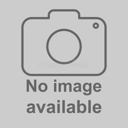

In [10]:
def download_image(url):
    return Image.open(requests.get(url, stream=True).raw)

download_image(df[nan_thumbnail_mask]['thumbnail'].iloc[0]).resize((128, 128))

### External Reference NaNs

An external reference is equivalent to the cadastral reference. It is the official and obligatory identifier of the real estate. It consists of an alphanumeric code that is assigned by the cadastre so that every property must have a single cadastral reference that allows it to be placed unequivocally in the cadastral cartography. It is like the ID of that property.

In [11]:
df.externalReference.unique()

array(['#ref183', '#ref182', '#ref181', ..., '10154', 'ICE28', 'ICE7'],
      dtype=object)

In [12]:
print(f'External Reference NaNs are {df.externalReference.isna().sum()} out of {df.shape[0]} rows')

External Reference NaNs are 5981 out of 31609 rows


Surprisingly, we have a lot of NaNs, around 20% of the rows contain a NaN. 

Actually, this column is not statistically meaningful and by now, a unique identifier does not provide any valuable insight.

Therefore, we think that dropping this column is the best way to handle these NaNs.

In [13]:
df.drop('externalReference', axis='columns', inplace=True)

In the future, in case we need more data, we can come back here and keep this column to perform web scraping and retrieve more information.

### Floor NaNs

The floor field determines on which floor is the flat or apartment located.

We expect some NaNs because chalets and or houses do not have a "floor".

In [14]:
print(f'Floor NaNs are {df.floor.isna().sum()} out of {df.shape[0]} rows')

Floor NaNs are 3397 out of 31609 rows


In [15]:
df.propertyType.value_counts()

flat            25650
chalet           2438
penthouse        1383
studio           1305
duplex            763
countryHouse       70
Name: propertyType, dtype: int64

In [16]:
for pt in df.propertyType.unique():
    pt_nan = df[df.propertyType == pt].floor.isna().sum()
    percentage = float(pt_nan) / df[df.propertyType == pt].shape[0]
    print(f'Property type {pt} has {pt_nan} floor NaN, '
          f'which represents a {int(percentage * 100)}%')

Property type flat has 984 floor NaN, which represents a 3%
Property type studio has 35 floor NaN, which represents a 2%
Property type penthouse has 77 floor NaN, which represents a 5%
Property type chalet has 2217 floor NaN, which represents a 90%
Property type duplex has 34 floor NaN, which represents a 4%
Property type countryHouse has 50 floor NaN, which represents a 71%


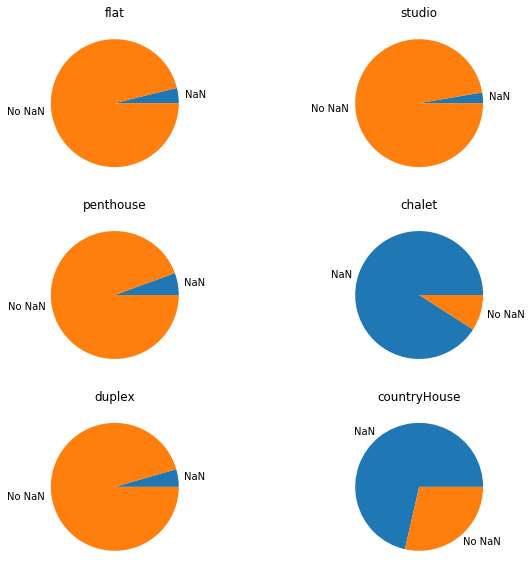

In [17]:
plt.figure(figsize=(10, 10))
for i, pt in enumerate(df.propertyType.unique(), start=1):
    plt.subplot(3, 2, i)
    pt_nan = df[df.propertyType == pt].floor.isna().sum()
    percentage = float(pt_nan) / df[df.propertyType == pt].shape[0]
    plt.pie([percentage, 1 - percentage], 
            labels=['NaN', 'No NaN'])
    plt.title(pt)
plt.show()

As expected, for Chalets and Country Houses we have a lot of NaNs, meaning that they are at the "ground".

For Country Houses we expect that all are at `bj`, therefore, in this case, we fill the NaNs with bj

In [18]:
df.loc[(df.propertyType == 'countryHouse') & df.floor.isna(), 'floor'] = 'bj'

The same happens for chalets

In [19]:
df.loc[(df.propertyType == 'chalet') & df.floor.isna(), 'floor'] = 'bj'

On the other hand, for the remaining property types, we should not have NaNs because a floor seems mandatory. to avoid removing data records, we keep these NaNs, but renaming them to `unknown` because the flat has actually a floor but it is unknown for the people who are visiting the Idealista page.

In [20]:
df['floor'].fillna('unknown', inplace=True)

### District NaNs

In order to fill the gaps in the DataFrame that no data appear in district columns, we have determined that changing the value of NaN to a blank space ' ', would be a better option than removing the lines in which no district appears.

In [21]:
df[~df.district.isna()].iloc[0].values
df['district'].fillna('', inplace=True)

### HasParkingSpace NaNs

To solve this problem we choose the replacement of each NaN value to a Boolean value, to be more exact `False` value.

In [22]:
df['parkingSpace_hasParkingSpace'].fillna(False, inplace=True)
df.head()

,propertyCode,thumbnail,numPhotos,floor,price,propertyType,operation,size,exterior,rooms,...,topNewDevelopment,detailedType_typology,suggestedTexts_subtitle,suggestedTexts_title,detailedType_subTypology,parkingSpace_hasParkingSpace,parkingSpace_isParkingSpaceIncludedInPrice,parkingSpace_parkingSpacePrice,neighborhood,newDevelopmentFinished
0,90142313,https://img3.idealista.com/blur/WEB_LISTING/0/...,10,1,520.0,flat,rent,55.0,True,1,...,False,flat,"Centro, Melilla","Piso en Calle Explorador Badía, 41",NaN,False,NaN,NaN,NaN,NaN
1,90142099,https://img3.idealista.com/blur/WEB_LISTING/0/...,11,en,420.0,studio,rent,45.0,True,0,...,False,flat,"Centro, Melilla","Estudio en Calle Explorador Badía, 41",studio,False,NaN,NaN,NaN,NaN
2,90141814,https://img3.idealista.com/blur/WEB_LISTING/0/...,18,3,680.0,flat,rent,65.0,True,2,...,False,flat,"Centro, Melilla","Piso en Calle Explorador Badía, 41",NaN,False,NaN,NaN,NaN,NaN
3,81959602,https://img3.idealista.com/blur/WEB_LISTING/0/...,23,2,650.0,flat,rent,105.0,True,3,...,False,flat,"El Industrial, Melilla","Piso en Calle General Polavieja, Melilla s/n",NaN,False,NaN,NaN,NaN,NaN
4,90128666,https://img3.idealista.com/blur/WEB_LISTING/0/...,22,en,650.0,flat,rent,75.0,True,2,...,False,flat,"El Industrial, Melilla","Piso en Plaza de la Goleta, 5",NaN,False,NaN,NaN,NaN,NaN


Also, each NaN value in `isParkingSpaceIncludedInPrice` has been taken into account when the flat has parking space. We decided to put each NaN value to 0.0, it doesn't matter if the parking price is included in the general price of the flat. 

In [23]:
df['parkingSpace_parkingSpacePrice'].fillna(.0, inplace=True)
df.head()

,propertyCode,thumbnail,numPhotos,floor,price,propertyType,operation,size,exterior,rooms,...,topNewDevelopment,detailedType_typology,suggestedTexts_subtitle,suggestedTexts_title,detailedType_subTypology,parkingSpace_hasParkingSpace,parkingSpace_isParkingSpaceIncludedInPrice,parkingSpace_parkingSpacePrice,neighborhood,newDevelopmentFinished
0,90142313,https://img3.idealista.com/blur/WEB_LISTING/0/...,10,1,520.0,flat,rent,55.0,True,1,...,False,flat,"Centro, Melilla","Piso en Calle Explorador Badía, 41",NaN,False,NaN,0.0,NaN,NaN
1,90142099,https://img3.idealista.com/blur/WEB_LISTING/0/...,11,en,420.0,studio,rent,45.0,True,0,...,False,flat,"Centro, Melilla","Estudio en Calle Explorador Badía, 41",studio,False,NaN,0.0,NaN,NaN
2,90141814,https://img3.idealista.com/blur/WEB_LISTING/0/...,18,3,680.0,flat,rent,65.0,True,2,...,False,flat,"Centro, Melilla","Piso en Calle Explorador Badía, 41",NaN,False,NaN,0.0,NaN,NaN
3,81959602,https://img3.idealista.com/blur/WEB_LISTING/0/...,23,2,650.0,flat,rent,105.0,True,3,...,False,flat,"El Industrial, Melilla","Piso en Calle General Polavieja, Melilla s/n",NaN,False,NaN,0.0,NaN,NaN
4,90128666,https://img3.idealista.com/blur/WEB_LISTING/0/...,22,en,650.0,flat,rent,75.0,True,2,...,False,flat,"El Industrial, Melilla","Piso en Plaza de la Goleta, 5",NaN,False,NaN,0.0,NaN,NaN


In [24]:
df['parkingSpace_isParkingSpaceIncludedInPrice'].fillna(False, inplace=True)
df.head()

,propertyCode,thumbnail,numPhotos,floor,price,propertyType,operation,size,exterior,rooms,...,topNewDevelopment,detailedType_typology,suggestedTexts_subtitle,suggestedTexts_title,detailedType_subTypology,parkingSpace_hasParkingSpace,parkingSpace_isParkingSpaceIncludedInPrice,parkingSpace_parkingSpacePrice,neighborhood,newDevelopmentFinished
0,90142313,https://img3.idealista.com/blur/WEB_LISTING/0/...,10,1,520.0,flat,rent,55.0,True,1,...,False,flat,"Centro, Melilla","Piso en Calle Explorador Badía, 41",NaN,False,False,0.0,NaN,NaN
1,90142099,https://img3.idealista.com/blur/WEB_LISTING/0/...,11,en,420.0,studio,rent,45.0,True,0,...,False,flat,"Centro, Melilla","Estudio en Calle Explorador Badía, 41",studio,False,False,0.0,NaN,NaN
2,90141814,https://img3.idealista.com/blur/WEB_LISTING/0/...,18,3,680.0,flat,rent,65.0,True,2,...,False,flat,"Centro, Melilla","Piso en Calle Explorador Badía, 41",NaN,False,False,0.0,NaN,NaN
3,81959602,https://img3.idealista.com/blur/WEB_LISTING/0/...,23,2,650.0,flat,rent,105.0,True,3,...,False,flat,"El Industrial, Melilla","Piso en Calle General Polavieja, Melilla s/n",NaN,False,False,0.0,NaN,NaN
4,90128666,https://img3.idealista.com/blur/WEB_LISTING/0/...,22,en,650.0,flat,rent,75.0,True,2,...,False,flat,"El Industrial, Melilla","Piso en Plaza de la Goleta, 5",NaN,False,False,0.0,NaN,NaN


### Subtopology NaNs

The Subtopology column means a type of the flat that the Idealista company could consider as a studio, flat, or any other. We understand that if this value doesn't appear the Subtopology will be unknown, so we changed the NaNs to "unknown".

In [25]:
df['detailedType_subTypology'].fillna("unknown", inplace=True)
df.head()

,propertyCode,thumbnail,numPhotos,floor,price,propertyType,operation,size,exterior,rooms,...,topNewDevelopment,detailedType_typology,suggestedTexts_subtitle,suggestedTexts_title,detailedType_subTypology,parkingSpace_hasParkingSpace,parkingSpace_isParkingSpaceIncludedInPrice,parkingSpace_parkingSpacePrice,neighborhood,newDevelopmentFinished
0,90142313,https://img3.idealista.com/blur/WEB_LISTING/0/...,10,1,520.0,flat,rent,55.0,True,1,...,False,flat,"Centro, Melilla","Piso en Calle Explorador Badía, 41",unknown,False,False,0.0,NaN,NaN
1,90142099,https://img3.idealista.com/blur/WEB_LISTING/0/...,11,en,420.0,studio,rent,45.0,True,0,...,False,flat,"Centro, Melilla","Estudio en Calle Explorador Badía, 41",studio,False,False,0.0,NaN,NaN
2,90141814,https://img3.idealista.com/blur/WEB_LISTING/0/...,18,3,680.0,flat,rent,65.0,True,2,...,False,flat,"Centro, Melilla","Piso en Calle Explorador Badía, 41",unknown,False,False,0.0,NaN,NaN
3,81959602,https://img3.idealista.com/blur/WEB_LISTING/0/...,23,2,650.0,flat,rent,105.0,True,3,...,False,flat,"El Industrial, Melilla","Piso en Calle General Polavieja, Melilla s/n",unknown,False,False,0.0,NaN,NaN
4,90128666,https://img3.idealista.com/blur/WEB_LISTING/0/...,22,en,650.0,flat,rent,75.0,True,2,...,False,flat,"El Industrial, Melilla","Piso en Plaza de la Goleta, 5",unknown,False,False,0.0,NaN,NaN


### Neighborhood NaNs

The neighborhood column represents the neighborhood where the flat is ubicated in a determined city. Since all our projects will have cities we assume that each one will have many neighborhoods. To replace the NaN value we will put a string value `unknown` because there is no other way we could estimate where the property is.

In [26]:
df[~df.neighborhood.isna()].iloc[1].values

array(['90145817',
       'https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/6b/01/70/784241735.jpg',
       40, '5', 630.0, 'flat', 'rent', 72.0, True, 2, 1,
       'Calle Dulcinea del Toboso', 'Las Palmas',
       'Las Palmas de Gran Canaria', 'Puerto - Canteras', 'es',
       28.1565682, -15.4277488, False,
       'https://www.idealista.com/inmueble/90145817/', '45342', False,
       'good', False, False, 9.0, False, False, False, False, 'flat',
       'La Isleta, Las Palmas de Gran Canaria',
       'Piso en Calle Dulcinea del Toboso', 'unknown', False, False, 0.0,
       'La Isleta', nan], dtype=object)

In [27]:
df['neighborhood'].fillna("Unknown", inplace=True)

### Status NaNs

The status refers to the conditions that the flat is at the moment, some different values could appear in this column. For instance, good, bad, etc. In order to replace the NaN values the string value, `unknown` could be fine to replace these values because we can't determine the status of a given flat.

In [28]:
df['status'].fillna("unknown", inplace=True)
df.head()

,propertyCode,thumbnail,numPhotos,floor,price,propertyType,operation,size,exterior,rooms,...,topNewDevelopment,detailedType_typology,suggestedTexts_subtitle,suggestedTexts_title,detailedType_subTypology,parkingSpace_hasParkingSpace,parkingSpace_isParkingSpaceIncludedInPrice,parkingSpace_parkingSpacePrice,neighborhood,newDevelopmentFinished
0,90142313,https://img3.idealista.com/blur/WEB_LISTING/0/...,10,1,520.0,flat,rent,55.0,True,1,...,False,flat,"Centro, Melilla","Piso en Calle Explorador Badía, 41",unknown,False,False,0.0,Unknown,NaN
1,90142099,https://img3.idealista.com/blur/WEB_LISTING/0/...,11,en,420.0,studio,rent,45.0,True,0,...,False,flat,"Centro, Melilla","Estudio en Calle Explorador Badía, 41",studio,False,False,0.0,Unknown,NaN
2,90141814,https://img3.idealista.com/blur/WEB_LISTING/0/...,18,3,680.0,flat,rent,65.0,True,2,...,False,flat,"Centro, Melilla","Piso en Calle Explorador Badía, 41",unknown,False,False,0.0,Unknown,NaN
3,81959602,https://img3.idealista.com/blur/WEB_LISTING/0/...,23,2,650.0,flat,rent,105.0,True,3,...,False,flat,"El Industrial, Melilla","Piso en Calle General Polavieja, Melilla s/n",unknown,False,False,0.0,Unknown,NaN
4,90128666,https://img3.idealista.com/blur/WEB_LISTING/0/...,22,en,650.0,flat,rent,75.0,True,2,...,False,flat,"El Industrial, Melilla","Piso en Plaza de la Goleta, 5",unknown,False,False,0.0,Unknown,NaN


### Has List NaNs

This field determines if a flat has a lift or not.

In [29]:
print(f'Has Lift NaNs are {df.hasLift.isna().sum()} out of {df.shape[0]} rows')

Has Lift NaNs are 3539 out of 31609 rows


If the hasLift column is NaN it is probably because the property type is in the "ground" as we previously mentioned, being properties like chalets and country houses.

In [30]:
for pt in df.propertyType.unique():
    pt_nan = df[df.propertyType == pt].hasLift.isna().sum()
    total_elems = df[df.propertyType == pt].shape[0]
    percentage = float(pt_nan) / float(total_elems)
    print(f'Property type {pt} has {pt_nan}/{total_elems} hasLift NaN, '
          f'which represents a {round(percentage * 100, 2)}%')

Property type flat has 930/25650 hasLift NaN, which represents a 3.63%
Property type studio has 53/1305 hasLift NaN, which represents a 4.06%
Property type penthouse has 27/1383 hasLift NaN, which represents a 1.95%
Property type chalet has 2438/2438 hasLift NaN, which represents a 100.0%
Property type duplex has 21/763 hasLift NaN, which represents a 2.75%
Property type countryHouse has 70/70 hasLift NaN, which represents a 100.0%


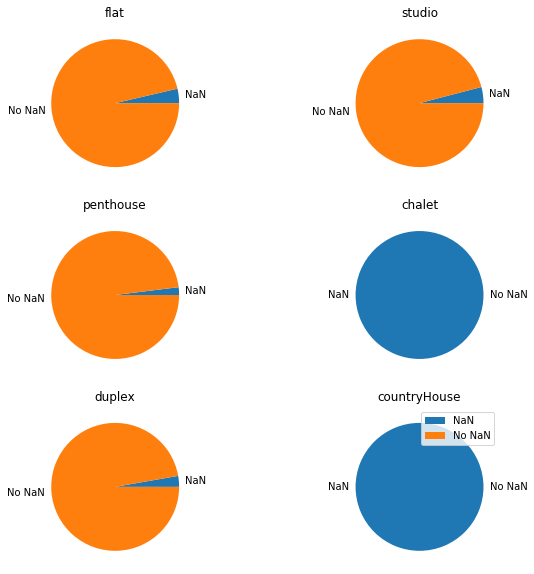

In [31]:
plt.figure(figsize=(10, 10))
for i, pt in enumerate(df.propertyType.unique(), start=1):
    plt.subplot(3, 2, i)
    pt_nan = df[df.propertyType == pt].hasLift.isna().sum()
    percentage = float(pt_nan) / df[df.propertyType == pt].shape[0]
    plt.pie([percentage, 1 - percentage], 
            labels=['NaN', 'No NaN'])
    plt.title(pt)
plt.legend()
plt.show()

As expected all chalets and all country houses have the hasLift property as NaN. We think that setting them to false makes sense since actually they do not have a lift.

In [32]:
mask = (df.propertyType == 'chalet') & (df.propertyType == 'countryHouse') & (df.hasLift.isna())
df.loc[mask, 'hasLift'] = False

For the remaining hasLift NaNs, we are going to assume that not having a lift is a bad characteristic of that property and therefore announcers will tend to hide this information. For this reason, we believe that most of the NaNs are going to actually be Falses.

In [33]:
df.hasLift.fillna(False, inplace=True)

### Development NaNs

The `newDevelopment` and `topNewDevelopment` properties, does not contain NaNs. The Development column that contains NaNs is `newDevelopmentFinished`.

In [34]:
print(f'newDevelopmentFinished NaNs are {df.newDevelopmentFinished.isna().sum()} out of {df.shape[0]} rows')

newDevelopmentFinished NaNs are 31476 out of 31609 rows


Almost all columns are NaNs which make us think that this is probably a legacy attribute of the Idealista database and now it is no longer used. For this reason, we dropped the column.

In [35]:
df.drop('newDevelopmentFinished', axis='columns', inplace=True)

To end with NaNs handling, we check the new DataFrame status

In [36]:
df.isna().any(0)

propertyCode                                  False
thumbnail                                     False
numPhotos                                     False
floor                                         False
price                                         False
propertyType                                  False
operation                                     False
size                                          False
exterior                                      False
rooms                                         False
bathrooms                                     False
address                                       False
province                                      False
municipality                                  False
district                                      False
country                                       False
latitude                                      False
longitude                                     False
showAddress                                   False
url         

### Checking type consistency

In this section, we are going to check if every column has its corresponding type.

In [37]:
df.dtypes

propertyCode                                   object
thumbnail                                      object
numPhotos                                       int64
floor                                          object
price                                         float64
propertyType                                   object
operation                                      object
size                                          float64
exterior                                         bool
rooms                                           int64
bathrooms                                       int64
address                                        object
province                                       object
municipality                                   object
district                                       object
country                                        object
latitude                                      float64
longitude                                     float64
showAddress                 

Status is a discrete variable with the following values:

In [38]:
df.status.unique()

array(['good', 'renew', 'unknown', 'newdevelopment'], dtype=object)

Therefore, makes sense to cast it to categorical type

In [39]:
df['status'] = df.status.astype('category')
dict(enumerate(df.status.cat.categories ))

{0: 'good', 1: 'newdevelopment', 2: 'renew', 3: 'unknown'}

The same happens for `spain_state`

In [40]:
df['province'] = df.province.astype('category')
dict(enumerate(df.province.cat.categories ))

{0: 'A Coruña',
 1: 'Alicante',
 2: 'Asturias',
 3: 'Balears (Illes)',
 4: 'Barcelona',
 5: 'Cantabria',
 6: 'Ceuta',
 7: 'Cáceres',
 8: 'Cádiz',
 9: 'Gibraltar',
 10: 'Girona',
 11: 'Granada',
 12: 'Guipúzcoa',
 13: 'Huelva',
 14: 'Las Palmas',
 15: 'León',
 16: 'Lleida',
 17: 'Madrid',
 18: 'Melilla',
 19: 'Murcia',
 20: 'Málaga',
 21: 'Navarra',
 22: 'Ourense',
 23: 'Palencia',
 24: 'Pontevedra',
 25: 'Santa Cruz de Tenerife',
 26: 'Sevilla',
 27: 'Soria',
 28: 'Tarragona',
 29: 'Teruel',
 30: 'Valladolid',
 31: 'València',
 32: 'Vizcaya',
 33: 'Zaragoza',
 34: 'Álava'}

The distance is an object, which does not make sense. We cast it to integer because it is expressed in km without decimals

In [41]:
df['distance'] = df.distance.astype('int32')

## Export the cleaned data

To finalize the data cleaning process, we export the cleaned data into a single ".csv" file.

In [42]:
df.to_csv('../data/processed/idealista_clean.csv', index=False)